In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import missingno as msn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingRegressor

In [ ]:
(1)데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
- 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 
  전체 과정을 포함하시오.

Mean Squared Error: 2341.827274813025
R2 Score: 0.9539977993379223


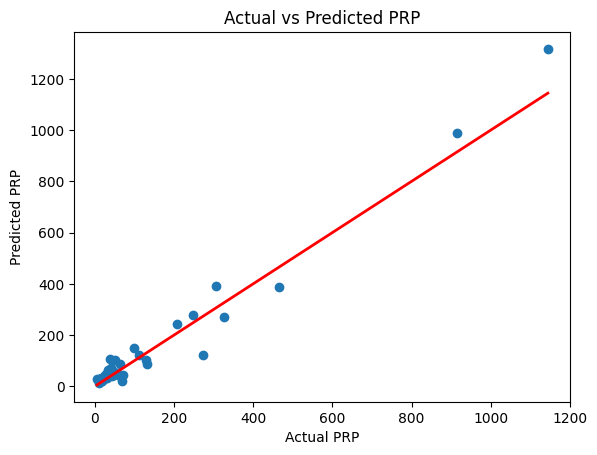

In [156]:
## 전체코드

#csv파일 데이터 불러오기
mdu = pd.read_csv("machine.data_update.csv")

#변수 형 변환
label_encoder = LabelEncoder()
mdu['VendorName'] = label_encoder.fit_transform(mdu['VendorName'])
mdu['ModelName'] = label_encoder.fit_transform(mdu['ModelName'])

# 특징(features)와 타겟 변수(target) 분리
X = mdu_num.drop("PRP", axis=1)
y = mdu_num["PRP"]

#데이터 전처리
mdu_num = mdu.select_dtypes(include=[np.number])
mdu_num.fillna(mdu_num.mean() , inplace=True)

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

# 모델 초기화
model = LinearRegression()
# 모델 훈련
model.fit(X_train, y_train)

# X_test의 값 예측하기
y_pred = model.predict(X_test)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', MSE)
print('R2 Score:', r2)

# 데이터 시각화
plt.scatter(y_test, y_pred )
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.plot([y_test.min() , y_test.max()] , [y_test.min() , y_test.max()] , color = 'red' , lw=2)
plt.show()

In [ ]:
(2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
- Mean squared Error, Mean absolute Error, R^2, 교차검증

In [162]:
# MSE 성능평가
MSE = mean_squared_error(y_test , y_pred)
print("MSE 성능 : " , MSE)

# MAE 성능평가
MAE = mean_absolute_error(y_test , y_pred)
print("MAE 성능 : " , MAE)

# R2 성능평가
R2 = r2_score(y_test , y_pred)
print("R2 성능 : " , R2)

# 교차 검증
c_score = cross_val_score(model , X_train , y_train , cv=5)
c_sm = cv_scores.mean()
print("교차검증 : " , c_sm)


MSE 성능 :  2341.827274813025
MAE 성능 :  31.45512055167569
R2 성능 :  0.9539977993379223
교차검증 :  0.8483803787701649


In [ ]:
(3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R2가 90% 이상이 나오도록 모델을 개선하시오.

MSE 성능 :  2341.827274813025
MAE 성능 :  31.45512055167569
R2 성능 :  0.9539977993379223
Testing set evaluation:
Mean Squared Error: 2341.827274813025
Mean Absolute Error: 31.45512055167569
R2 Score: 0.9539977993379223


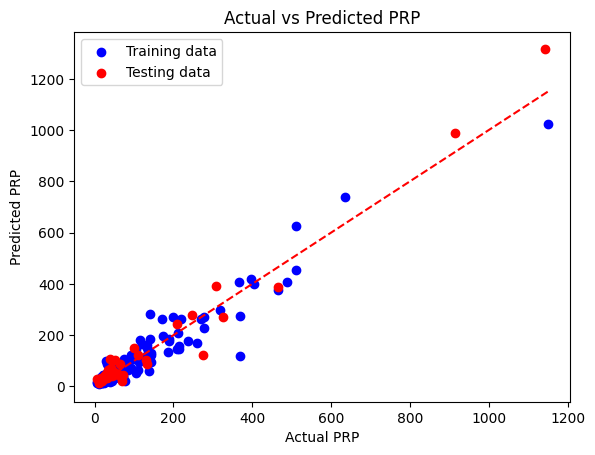

In [185]:
#변수 형 변환
label_encoder = LabelEncoder()
mdu['VendorName'] = label_encoder.fit_transform(mdu['VendorName'])
mdu['ModelName'] = label_encoder.fit_transform(mdu['ModelName'])

# 특징(features)와 타겟 변수(target) 분리
X = mdu_num.drop("PRP", axis=1)
y = mdu_num["PRP"]

#데이터 전처리
mdu_num = mdu.select_dtypes(include=[np.number])
mdu_num.fillna(mdu_num.mean() , inplace=True)

# 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Ridge 회귀 모델 초기화 및 훈련
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)


# MSE 성능평가
MSE = mean_squared_error(y_test , y_pred)
print("MSE 성능 : " , MSE)

# MAE 성능평가
MAE = mean_absolute_error(y_test , y_pred)
print("MAE 성능 : " , MAE)

# R2 성능평가
R2 = r2_score(y_test , y_pred)
print("R2 성능 : " , R2)


print('Testing set evaluation:')
print('Mean Squared Error:', MSE)
print('Mean Absolute Error:', MAE)
print('R2 Score:', R2)

# 결과 시각화
plt.scatter(y_train, y_tp, color='blue', label='Training data')
plt.scatter(y_test, y_pred, color='red', label='Testing data')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.legend()
plt.show()